In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


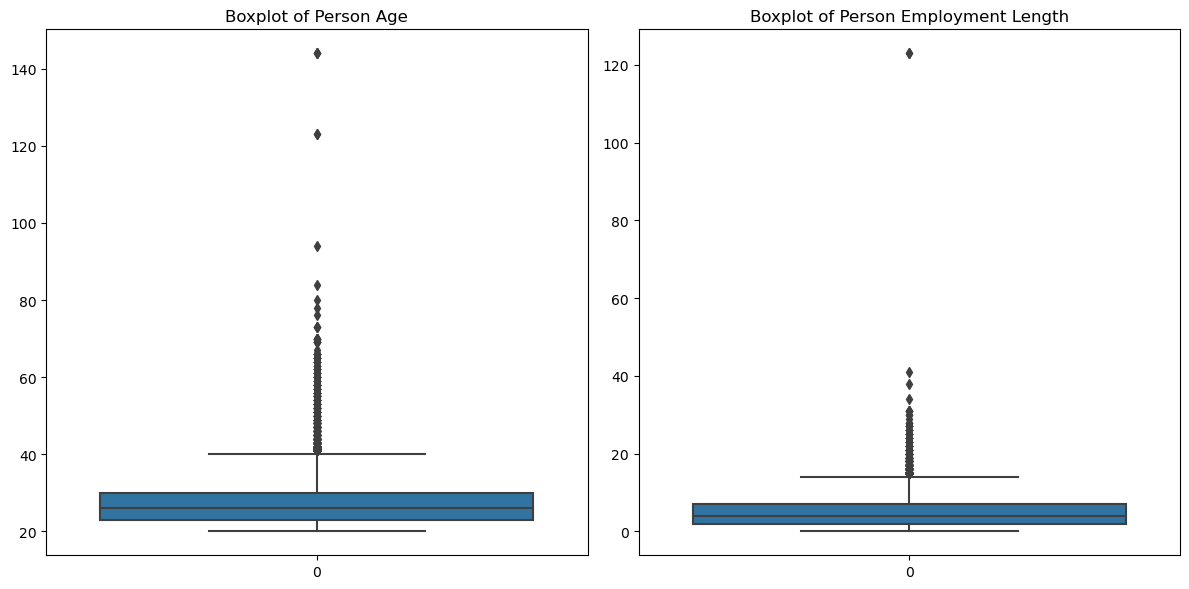

In [7]:
#visualizing outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df['person_age'])
plt.title('Boxplot of Person Age')

plt.subplot(1, 2, 2)
sns.boxplot(df['person_emp_length'])
plt.title('Boxplot of Person Employment Length')

plt.tight_layout()
plt.show()


In [8]:
#removing outliers
Q1_age = df['person_age'].quantile(0.25)
Q3_age = df['person_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
age_lower_bound = Q1_age - 1.5 * IQR_age
age_upper_bound = Q3_age + 1.5 * IQR_age

Q1_emp = df['person_emp_length'].quantile(0.25)
Q3_emp = df['person_emp_length'].quantile(0.75)
IQR_emp = Q3_emp - Q1_emp
emp_lower_bound = Q1_emp - 1.5 * IQR_emp
emp_upper_bound = Q3_emp + 1.5 * IQR_emp

df = df[(df['person_age'] >= age_lower_bound) & (df['person_age'] <= age_upper_bound)]
df = df[(df['person_emp_length'] >= emp_lower_bound) & (df['person_emp_length'] <= emp_upper_bound)]


In [9]:
df.shape

(29531, 12)

In [10]:
df.describe(include=['object'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,29531,29531,29531,29531
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,15170,5982,9638,24280


In [11]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2820
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)


In [13]:
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].transform(lambda x: x.fillna(x.median()))


In [14]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [15]:
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)

In [16]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [17]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['loan_status'].sort_values(ascending=False)
print(correlation_with_target)

loan_status                    1.000000
loan_percent_income            0.380350
loan_int_rate                  0.335919
loan_grade_D                   0.320625
person_home_ownership_RENT     0.233893
loan_grade_E                   0.182831
cb_person_default_on_file_Y    0.179889
loan_amnt                      0.108581
loan_grade_F                   0.102358
loan_grade_G                   0.083178
loan_intent_MEDICAL            0.055965
loan_intent_HOMEIMPROVEMENT    0.038663
person_home_ownership_OTHER    0.014305
loan_grade_C                  -0.013649
loan_intent_PERSONAL          -0.017663
cb_person_cred_hist_length    -0.020884
person_age                    -0.028493
loan_intent_EDUCATION         -0.060603
loan_intent_VENTURE           -0.073975
person_emp_length             -0.090300
loan_grade_B                  -0.096019
person_home_ownership_OWN     -0.101461
person_income                 -0.184866
Name: loan_status, dtype: float64


In [18]:
# Debt-to-Income Ratio
df['DTI'] = df['loan_amnt'] / df['person_income']

# Age to Credit History Length Ratio
df['age_to_cred_hist_ratio'] = df['person_age'] / df['cb_person_cred_hist_length']

# Loan Amount to Age Ratio
df['loan_to_age_ratio'] = df['loan_amnt'] / df['person_age']

# Creating an interaction feature to capture combined effect of borrower's income and loan amount.
df['income_loan_interaction'] = df['person_income'] * df['loan_amnt']


In [19]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,DTI,age_to_cred_hist_ratio,loan_to_age_ratio,income_loan_interaction
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,0,0,0,0.104167,10.500000,47.619048,9600000
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,0,0,0.572917,8.333333,220.000000,52800000
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,0,0,0.534351,11.500000,1521.739130,2292500000
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,0,1,0.643382,6.000000,1458.333333,1904000000
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,0,0,0,0,0.252525,10.500000,119.047619,24750000


In [20]:
df.duplicated().sum()

153

In [21]:
df.drop_duplicates(inplace=True)

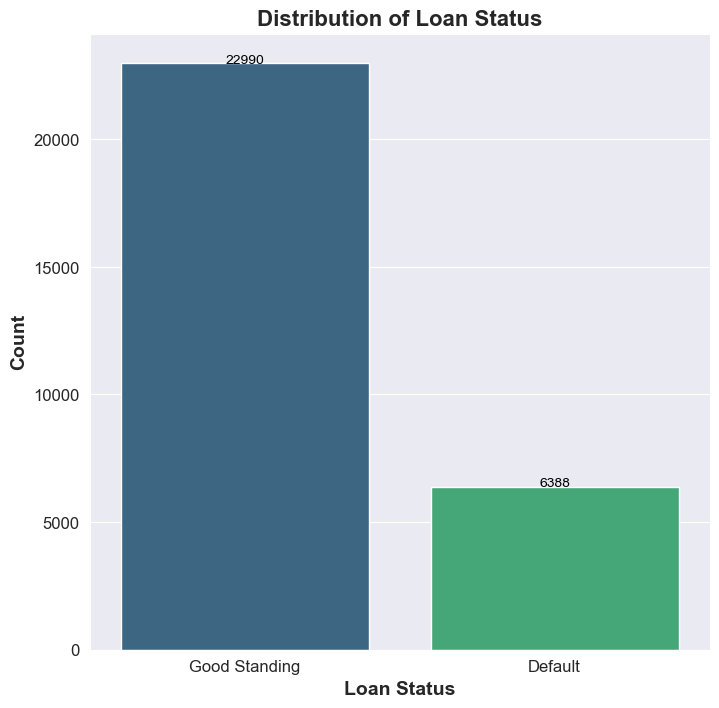

In [34]:
sns.set_style('darkgrid')

plt.figure(figsize=(8, 8))

ax = sns.countplot(x='loan_status', data=df, palette="viridis")

ax.set_xticklabels(['Good Standing', 'Default'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, 
            '{:1.0f}'.format(height), 
            ha="center", color="black")

plt.title('Distribution of Loan Status', fontweight='bold', fontsize=16)
plt.xlabel('Loan Status', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

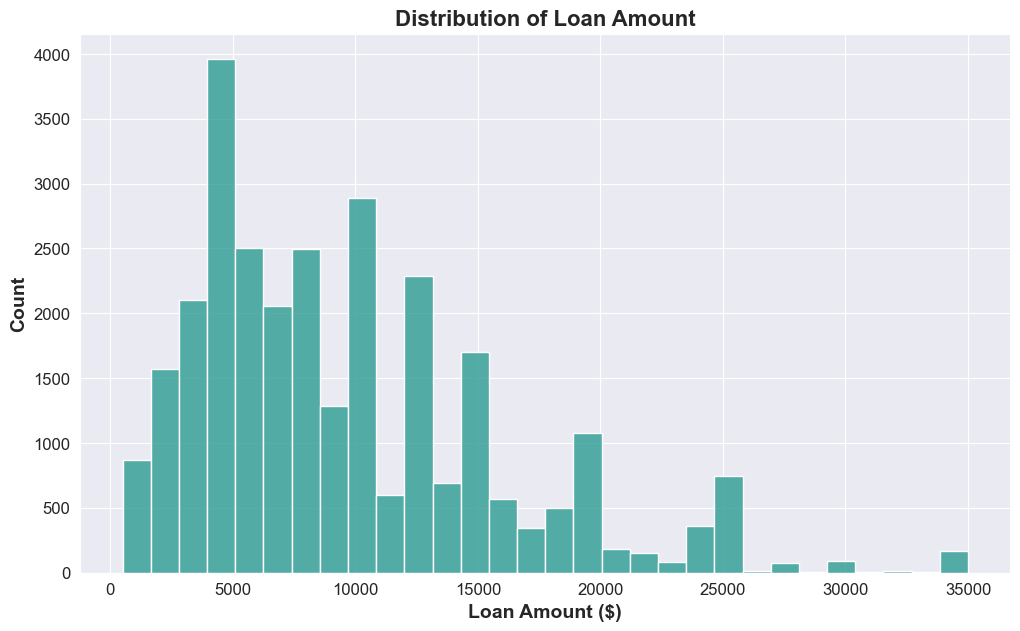

In [42]:
plt.figure(figsize=(12, 7))

sns.histplot(df['loan_amnt'], bins=30, color="#1F968B") 

plt.title('Distribution of Loan Amount', fontweight='bold', fontsize=16)
plt.xlabel('Loan Amount ($)', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

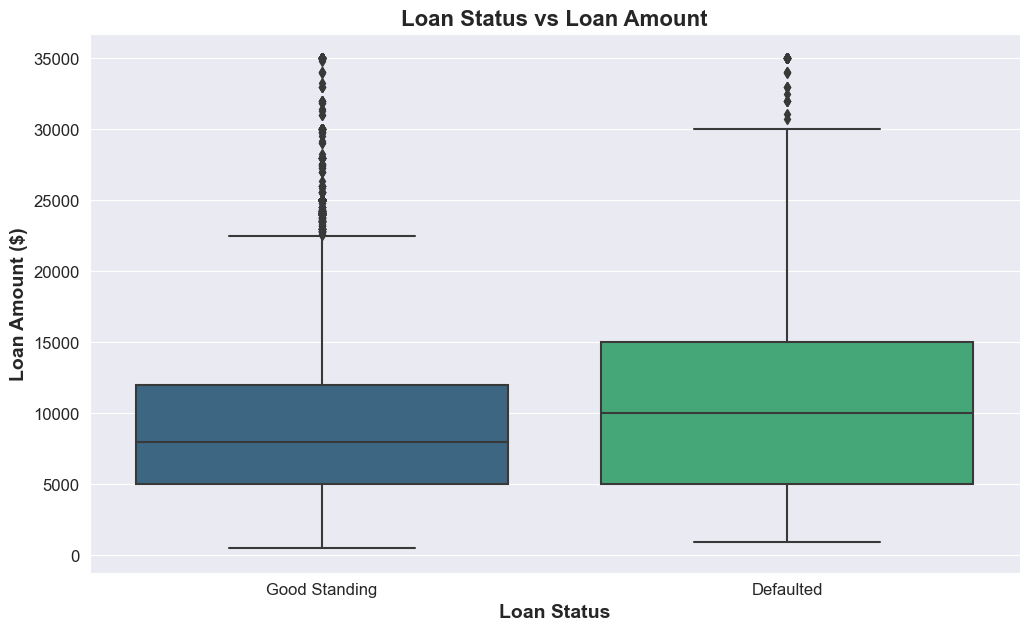

In [41]:
plt.figure(figsize=(12, 7))

sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette="viridis")

plt.title('Loan Status vs Loan Amount', fontweight='bold', fontsize=16)
plt.xlabel('Loan Status', fontweight='bold', fontsize=14)
plt.ylabel('Loan Amount ($)', fontweight='bold', fontsize=14)
plt.xticks([0, 1], ['Good Standing', 'Defaulted'], fontsize=12)
plt.yticks(fontsize=12)

plt.show()

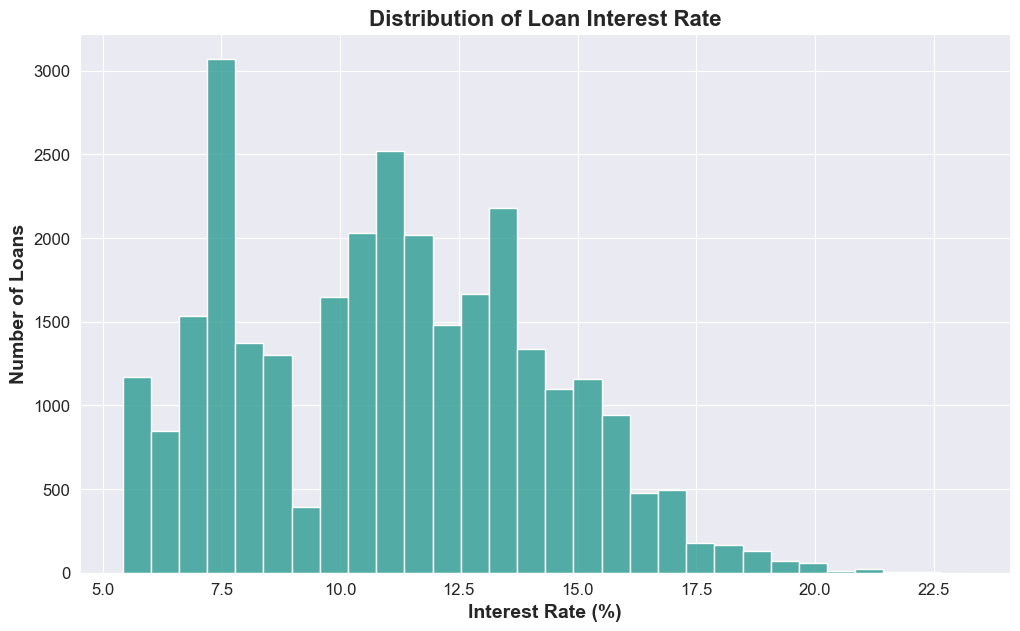

In [43]:
plt.figure(figsize=(12, 7))

sns.histplot(df['loan_int_rate'], bins=30, color="#1F968B")

plt.title('Distribution of Loan Interest Rate', fontweight='bold', fontsize=16)
plt.xlabel('Interest Rate (%)', fontweight='bold', fontsize=14)
plt.ylabel('Number of Loans', fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


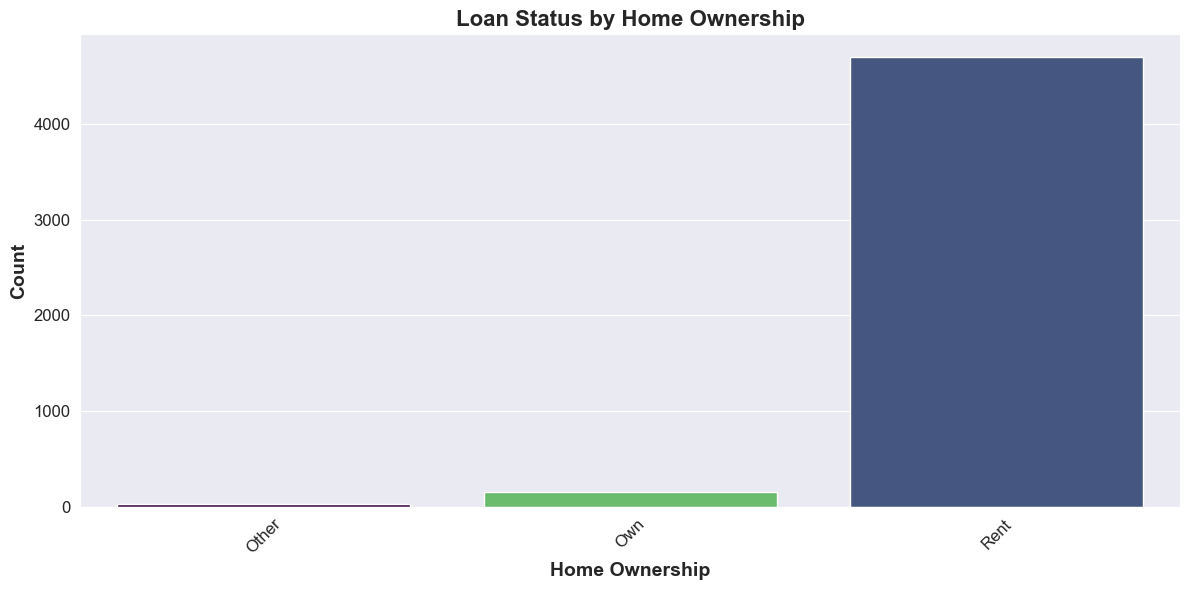

In [48]:
ownership_cols = [col for col in df.columns if 'person_home_ownership' in col]
melted_df = df.melt(id_vars='loan_status', value_vars=ownership_cols)
melted_df = melted_df[melted_df['value'] == 1]

# Mapping the columns to more human-readable labels
ownership_labels = {
    'person_home_ownership_MORTGAGE': 'Mortgage',
    'person_home_ownership_OTHER': 'Other',
    'person_home_ownership_OWN': 'Own',
    'person_home_ownership_RENT': 'Rent'
}

# Manually setting colors
colors_dict = {
    'person_home_ownership_MORTGAGE': plt.cm.viridis(0.5),
    'person_home_ownership_OTHER': "#440154FF",
    'person_home_ownership_OWN': plt.cm.viridis(0.75),
    'person_home_ownership_RENT': plt.cm.viridis(0.25)
}

plt.figure(figsize=(12, 6))

sns.countplot(data=melted_df[melted_df['loan_status'] == 1], x='variable', palette=colors_dict)

plt.title('Loan Status by Home Ownership', fontweight='bold', fontsize=16)
plt.xlabel('Home Ownership', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontweight='bold', fontsize=14)

# Filtering the dictionary to only contain the unique values from the dataframe
filtered_labels = [ownership_labels[label] for label in melted_df['variable'].unique()]

plt.xticks(ticks=np.arange(len(filtered_labels)), labels=filtered_labels, rotation=45, fontsize=12)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()





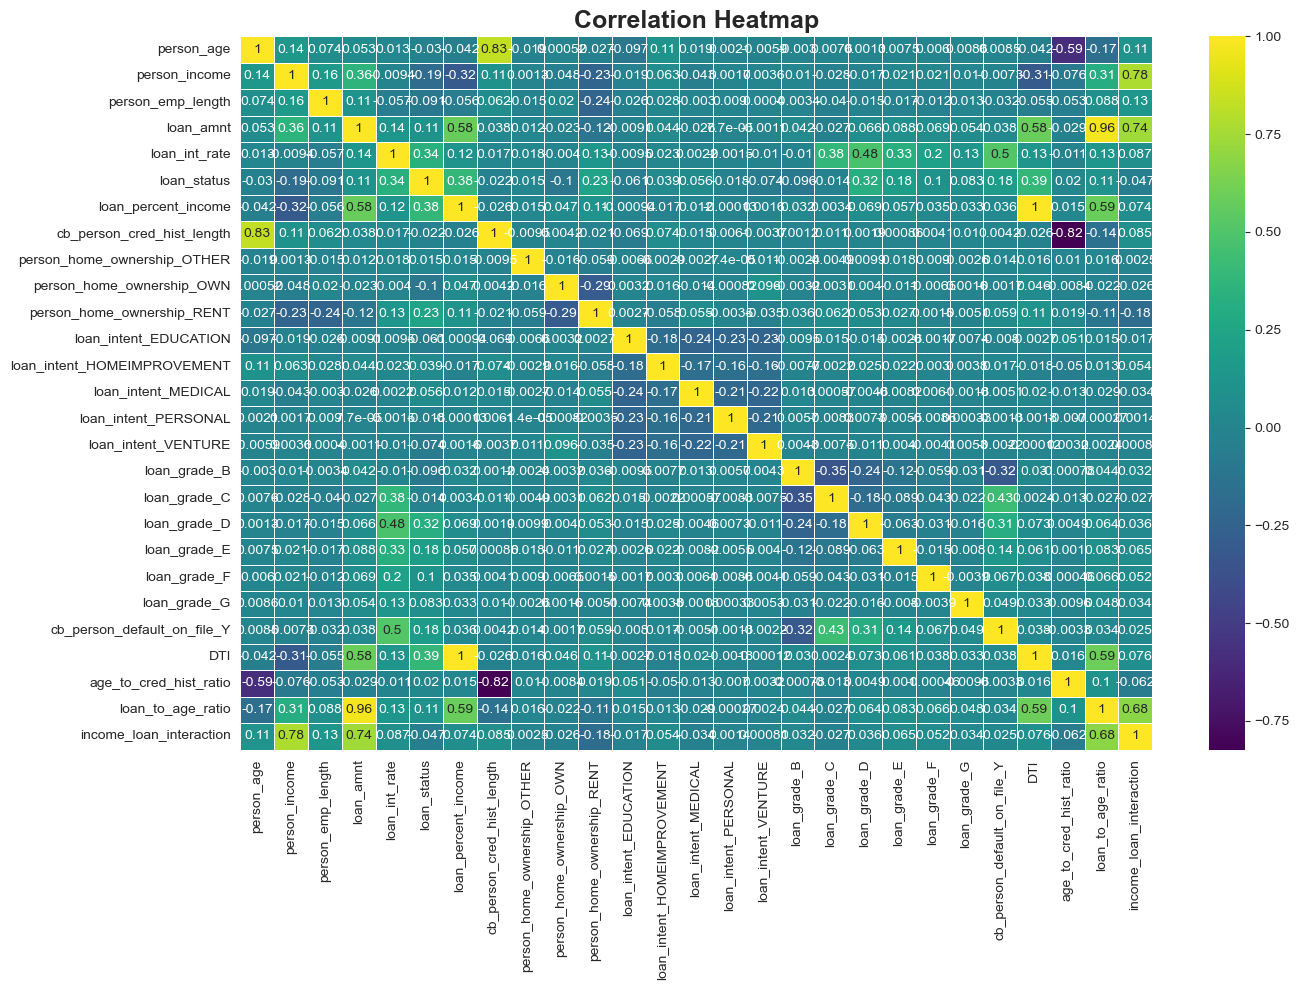

In [49]:
plt.figure(figsize=(14, 10))

sns.heatmap(df.corr(), cmap="viridis", annot=True, linewidths=.5, annot_kws={"size": 10})

plt.title('Correlation Heatmap', fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()
